In [1]:
from qiskit.circuit import QuantumCircuit, QuantumRegister
from qiskit_ibm_runtime import QiskitRuntimeService
import numpy as np
from rustworkx import vf2_mapping
from qiskit.converters import circuit_to_dag
from qiskit.transpiler.passes.layout.vf2_utils import build_average_error_map, build_interaction_graph, score_layout
from qiskit.transpiler.passes.layout.vf2_utils import (build_average_error_map, build_bit_list, 
                    build_edge_list, build_interaction_graph, score_layout, shuffle_coupling_graph)
from qiskit.visualization import plot_circuit_layout
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

In [2]:
from cobos.tokens import ibm_token
# Get device as a target
service = QiskitRuntimeService(channel="ibm_quantum", token=ibm_token)
backend = service.backend('ibm_sherbrooke')
target = backend.target

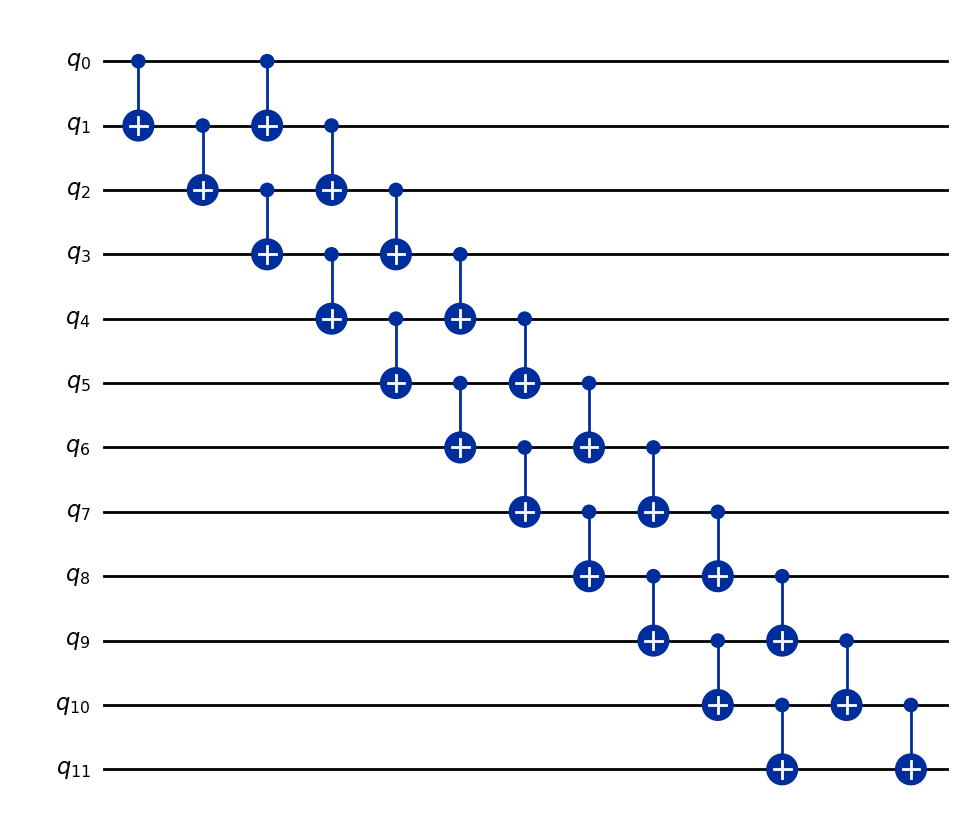

In [3]:
# Create example circuit
num_qubits = 12
qc = QuantumCircuit(num_qubits)
_ = [qc.cx(idx, idx+1) for idx in range(num_qubits-1)]
_ = [qc.cx(idx, idx+1) for idx in range(num_qubits-1)]
qc.draw('mpl', fold=100)

In [4]:
# Get device graph
coupling_map = target.build_coupling_map()
print(coupling_map)

[[1, 0], [1, 2], [3, 2], [4, 3], [4, 15], [5, 4], [6, 5], [7, 6], [7, 8], [8, 9], [10, 9], [10, 11], [11, 12], [12, 13], [14, 0], [14, 18], [16, 8], [17, 12], [17, 30], [18, 19], [19, 20], [20, 33], [21, 20], [21, 22], [22, 15], [23, 22], [23, 24], [25, 24], [26, 16], [26, 25], [26, 27], [28, 27], [29, 28], [29, 30], [31, 30], [31, 32], [32, 36], [33, 39], [34, 24], [35, 28], [35, 47], [36, 51], [37, 38], [38, 39], [40, 39], [41, 40], [41, 53], [42, 41], [43, 34], [43, 42], [43, 44], [45, 44], [45, 46], [47, 46], [47, 48], [49, 48], [49, 50], [50, 51], [52, 37], [53, 60], [54, 45], [55, 49], [56, 52], [56, 57], [57, 58], [59, 58], [59, 60], [61, 60], [61, 62], [63, 62], [63, 64], [64, 54], [64, 65], [66, 65], [67, 66], [68, 55], [68, 67], [69, 68], [69, 70], [71, 58], [71, 77], [72, 62], [73, 66], [73, 85], [74, 70], [75, 76], [77, 76], [78, 77], [78, 79], [79, 91], [80, 79], [80, 81], [81, 72], [81, 82], [82, 83], [84, 83], [85, 84], [86, 85], [86, 87], [87, 88], [89, 74], [89, 88], [

In [5]:
# Get circuit graph
dag = circuit_to_dag(qc)
result = build_interaction_graph(dag, False)
im_graph, im_graph_node_map, reverse_im_graph_node_map, free_nodes = result
cm_graph, cm_nodes = shuffle_coupling_graph(coupling_map, seed=0, strict_direction=False)

In [6]:
# obtain an iterator over all vf2 mappings between - I don't think it's ALL, trying to figure this out now
# the shuffled coupling graph and the interaction graph
call_limit = int(3e7)
mappings = vf2_mapping(
            cm_graph,
            im_graph,
            subgraph=True,
            id_order=False,
            induced=False,
            call_limit=call_limit
)

In [7]:
layouts = []
for mapping in list(mappings):
    # create the mapping dictionary
    layout_mapping = {im_i: cm_nodes[cm_i] for cm_i, im_i in mapping.items()}
    print(layout_mapping)
    layouts.append([layout_mapping[idx] for idx in range(num_qubits)])

{1: 22, 2: 21, 0: 15, 3: 20, 4: 33, 5: 39, 6: 40, 7: 41, 8: 42, 9: 43, 10: 34, 11: 24}
{1: 22, 2: 21, 0: 15, 3: 20, 4: 33, 5: 39, 6: 40, 7: 41, 8: 42, 9: 43, 10: 44, 11: 45}
{1: 22, 2: 21, 0: 15, 3: 20, 4: 33, 5: 39, 6: 40, 7: 41, 8: 53, 9: 60, 10: 61, 11: 62}
{1: 22, 2: 21, 0: 15, 3: 20, 4: 33, 5: 39, 6: 40, 7: 41, 8: 53, 9: 60, 10: 59, 11: 58}
{1: 22, 2: 21, 0: 15, 3: 20, 4: 33, 5: 39, 6: 38, 7: 37, 8: 52, 9: 56, 10: 57, 11: 58}
{1: 22, 2: 21, 0: 15, 3: 20, 4: 19, 5: 18, 6: 14, 7: 0, 8: 1, 9: 2, 10: 3, 11: 4}
{1: 22, 2: 21, 0: 23, 3: 20, 4: 33, 5: 39, 6: 40, 7: 41, 8: 42, 9: 43, 10: 34, 11: 24}
{1: 22, 2: 21, 0: 23, 3: 20, 4: 33, 5: 39, 6: 40, 7: 41, 8: 42, 9: 43, 10: 44, 11: 45}
{1: 22, 2: 21, 0: 23, 3: 20, 4: 33, 5: 39, 6: 40, 7: 41, 8: 53, 9: 60, 10: 61, 11: 62}
{1: 22, 2: 21, 0: 23, 3: 20, 4: 33, 5: 39, 6: 40, 7: 41, 8: 53, 9: 60, 10: 59, 11: 58}
{1: 22, 2: 21, 0: 23, 3: 20, 4: 33, 5: 39, 6: 38, 7: 37, 8: 52, 9: 56, 10: 57, 11: 58}
{1: 22, 2: 21, 0: 23, 3: 20, 4: 19, 5: 18, 6: 14

In [8]:
print('Num of layouts: ', len(layouts))

Num of layouts:  4680


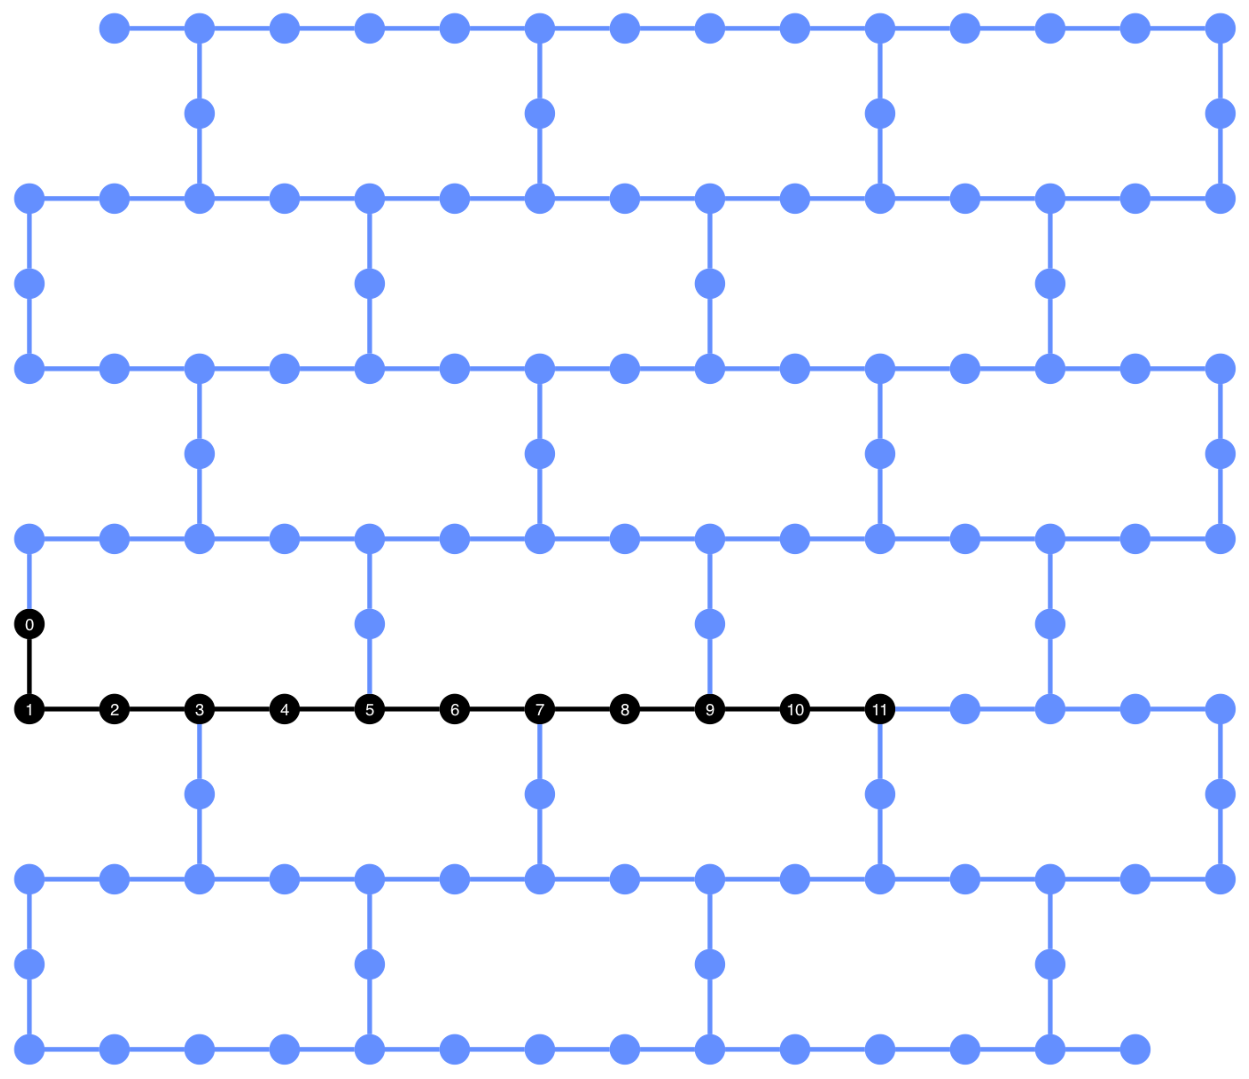

In [13]:
# Draw a layout
index = 1250
layout = list(layouts[index])
pm = generate_preset_pass_manager(3, target=target, initial_layout=layout)
qc_layout = pm.run(qc)
plot_circuit_layout(qc_layout, backend, view='virtual')